In [ ]:
#Dataset
!gdown --id 1Z2bahf9YfvJBHOuMGsYf2Ev-JxH8fsJb

#kamus kata baku
!gdown --id 194oZ835-oFSCWpI6b5CkvGYPhLTQBOgQ

#Kamus StopWord
!gdown --id 1NL5EOgfdM76MQlmUs2XyA1i9-yKna75-

#preprocessing
!gdown --id 19anmRlaSDOlMPhIXxxNoq0hwKRXh4t9e

#kamus kata baku
!gdown --id 1I40ERrJs12gvY1r3RK2B1HshRPuaIxWu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Z2bahf9YfvJBHOuMGsYf2Ev-JxH8fsJb
To: /content/UpdateDataset.xlsx
100% 459k/459k [00:00<00:00, 85.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=194oZ835-oFSCWpI6b5CkvGYPhLTQBOgQ
To: /content/kamuskatabaku.xlsx
100% 258k/258k [00:00<00:00, 82.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: ht

In [ ]:
!pip install transformers torch nltk Sastrawi
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import nltk
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, AdamWeightDecay, Adafactor
import torch
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt #visualiasi data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #visualisasi wordcloud (menampilkan kata yang paling banyak digunakan)
from sklearn.feature_extraction.text import CountVectorizer #ambil vector jarak antar kata untuk n gram
from nltk.corpus import stopwords
import string

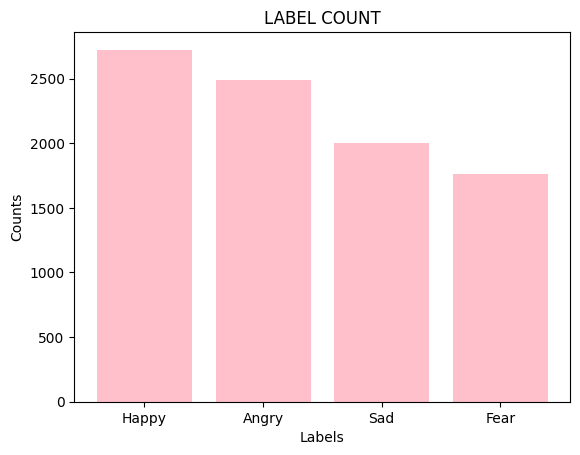

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Happy', 'Angry', 'Sad', 'Fear']
values = [2723, 2492, 2001, 1762]

# Membuat bar plot
plt.bar(labels, values, color='pink')

# Menambahkan label dan judul
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('LABEL COUNT')

# Menyimpan plot sebagai file gambar
file_path = "Jumlah_Data_Berdasarkan_Label.png"
plt.savefig(file_path, dpi=300, bbox_inches='tight')  # Pastikan menyimpan sebelum show()

# Menampilkan plot
plt.show()


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Load Dataset
data = pd.read_excel ('UpdateDataset.xlsx')

# Menghitung jumlah masing-masing label
label_counts = data['Label'].value_counts()

# Menampilkan hasil
print(label_counts)

Label
Bahagia    2723
Marah      2237
Sedih      2001
Takut      1762
Name: count, dtype: int64


In [ ]:
data.head(5) #buat ambil data label

,Label,full_text
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...


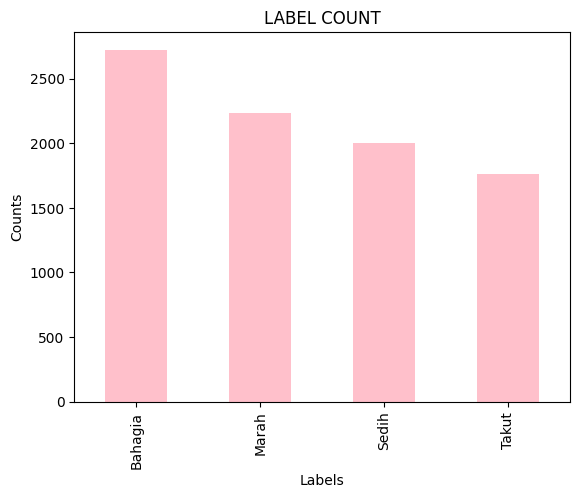

In [ ]:
label_counts = data['Label'].value_counts() #untuk ambil jumlah masing masing kelas

label_counts.plot(kind='bar', color='pink') #visualiasi bar plot


plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('LABEL COUNT')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


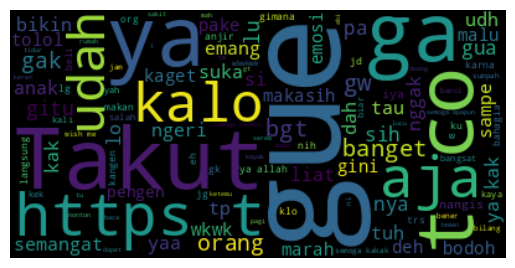

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
text = " ".join(review for review in data.full_text) #visuliasi data yang sering muncul
stopword = set(stopwords.words('indonesian'))
stopword.update(["yg"])
wordcloud = WordCloud(stopwords = stopword).generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Preprocessing

In [ ]:
# 1. Case Folding
#def case_folding(text):
#    return text.lower()

#data['TEKS_clean'] = data['full_text'].apply(case_folding)
#print(data['TEKS_clean'])

data['Text Case Folding'] = data['full_text'].str.lower()

print('Case Folding Result : \n')
data.head()

Case Folding Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,@idgfbrh bisaa lewat wa kakk?
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,@sinnapreqnar 25 sih kakk. rate berapa?
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,@convomf tinggalin aja nder bakal bikin capek ...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta https://t.co/uyqaebwmuz
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,@bbama1409 kak aku mau dong tapi aku gabisaa d...


In [ ]:
# 2. Text Cleansing
def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_tweet_special)

print('Cleansing (Remove Tweet Special) Result : \n')
data.head()

Cleansing (Remove Tweet Special) Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk?
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,25 sih kakk. rate berapa?
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu


In [ ]:
#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_number)

print('Cleansing (Remove Number) Result : \n')
data.head()

Cleansing (Remove Number) Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk?
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,sih kakk. rate berapa?
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu


In [ ]:
#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_punctuation)

print('Cleansing (Remove Punctuation) Result : \n')
data.head()

Cleansing (Remove Punctuation) Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,sih kakk rate berapa
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu


In [ ]:
#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_whitespace_multiple)

print('Cleansing (Remove Whitespace) Result : \n')
data.head()

Cleansing (Remove Whitespace) Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,sih kakk rate berapa
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu


In [ ]:
# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

data['Text Case Folding'] = data['Text Case Folding'].apply(remove_singl_char)

print('Cleansing (Remove SingleChar) Result : \n')
data.head()

Cleansing (Remove SingleChar) Result : 



,Label,full_text,Text Case Folding
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,sih kakk rate berapa
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu


In [ ]:
# 3. Tokenisasi & Normalisasi (gunakan tokenizer BERT)
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

data['Text Tokenizing'] = data['Text Case Folding'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(data['Text Tokenizing'].head())
print('\n\n\n')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenizing Result : 

0                             [bisaa, lewat, wa, kakk]
1                            [sih, kakk, rate, berapa]
2    [tinggalin, aja, nder, bakal, bikin, capek, ba...
3                            [kangen, blu, nya, tirta]
4    [kak, aku, mau, dong, tapi, aku, gabisaa, dm, ...
Name: Text Tokenizing, dtype: object






In [ ]:
# 4. Normalisasi Teks
normalizad_word = pd.read_excel("kamuskatabaku.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Text Normalization'] = data['Text Tokenizing'].apply(normalized_term)

data['Text Normalization'].head()

<ipython-input-16-e1962c082418>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-16-e1962c082418>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,Text Normalization
0,"[bisa, lewat, wa, kak]"
1,"[sih, kak, rate, berapa]"
2,"[tinggalkan, saja, nder, bakal, bikin, capek, ..."
3,"[kangen, blu, nya, tirta]"
4,"[kak, aku, mau, dong, tapi, aku, gabisaa, dm, ..."


In [ ]:
# 5. Stemming (gunakan Sastrawi)
!pip install swifter

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


factory = StemmerFactory()
stemmer = factory.create_stemmer()


def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in data['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['Text Stemming'] = data['Text Normalization'].swifter.apply(get_stemmed_term)
print(data['Text Stemming'])

Output streaming akan dipotong hingga 5000 baris terakhir.
diciptakan : cipta
viral : viral
digunakan : guna
perusahaan : usaha
penciptanya : cipta
woozi : woozi
cetak : cetak
undangan : undang
plek : plek
pupil : pupil
kucek : kucek
jangaan : jangaan
nyopotinnya : nyopotinnya
mencubit : cubit
preinst : preinst
kelirik : lirik
check : check
kretek : kretek
mudi : mud
jompo : jompo
literasi : literasi
nnya : nnya
jeje : jeje
dijilat : jilat
menghirup : hirup
cayy : cayy
malumalu : malumalu
almarhum : almarhum
jemput : jemput
diantar : antar
desiliun : desiliun
hisabnya : hisab
hh : hh
kating : kating
mkp : mkp
tajam : tajam
membekas : bekas
ketambahan : tambah
nggagguin : nggagguin
cuddle : cuddle
sultan : sultan
moots : moots
ghaib : ghaib
beuhh : beuhh
memaafkan : maaf
jumlahnya : jumlah
nanganin : nanganin
bajunya : baju
ditengah : tengah
gitarisnya : gitaris
infp : infp
terorganisir : organisir
pon : pon
umm : umm
oversharing : oversharing
dinamain : dinamain
hamba : hamba
cekek : c

Pandas Apply:   0%|          | 0/8723 [00:00<?, ?it/s]

0                                  [bisa, lewat, wa, kak]
1                                [sih, kak, rate, berapa]
2       [tinggal, saja, nder, bakal, bikin, capek, ban...
3                               [kangen, blu, nya, tirta]
4       [kak, aku, mau, dong, tapi, aku, gabisaa, dm, ...
                              ...                        
8718    [siapa, tau, lewat, tl, twitter, anak, biar, m...
8719    [februari, hari, ter, shibal, banget, kenapa, ...
8720    [sekarang, baru, lu, semua, bikin, gera, cuci,...
8721    [tbl, tbl, takut, banget, loh, iri, kan, lo, e...
8722    [mana, saja, kliaan, kok, baru, kaget, sekaran...
Name: Text Stemming, Length: 8723, dtype: object


In [ ]:
# 6. Stopword Removal
nltk.download('stopwords')
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')


list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy'])


txt_stopword = pd.read_csv("stopwordbahasa.txt", names= ["stopwords"], header = None)


list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
list_stopwords = set(list_stopwords)


def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

data['TEKS_clean'] = data['Text Stemming'].apply(stopwords_removal)


print(data['TEKS_clean'].head())

0                         [wa, kak]
1                       [kak, rate]
2    [tinggal, nder, capek, banget]
3              [kangen, blu, tirta]
4                [kak, gabisaa, dm]
Name: TEKS_clean, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Apply preprocessing pipeline
# data['TEKS_clean'] = data['TEKS'].apply(case_folding)
# data['TEKS_clean'] = data['TEKS_clean'].apply(text_cleaning)
# data['TEKS_clean'] = data['TEKS_clean'].apply(normalize_text)
# data['TEKS_clean'] = data['TEKS_clean'].apply(stemming)
# data['TEKS_clean'] = data['TEKS_clean'].apply(remove_stopwords)

data.to_excel('data_prepocessing.xlsx', index = False)

In [ ]:
data.columns

Index(['Label', 'full_text', 'Text Case Folding', 'Text Tokenizing',
       'Text Normalization', 'Text Stemming', 'TEKS_clean'],
      dtype='object')

In [ ]:
# Correct column names based on the image
data_columns = ["label", "tweet", "Text Case Folding", "Text Tokenizing", "Text Normalization", "Text Stemming", "TEKS_clean"]

# Load Data with comma delimiter, skip the first row, and handle quotes properly
data = pd.read_excel("data_prepocessing.xlsx", header=0)

# Assign column names
data.columns = data_columns

# Display the first few rows in table view
data.head()

,label,tweet,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,TEKS_clean
0,Bahagia,@idgfbrh Bisaa lewat wa kakk?,bisaa lewat wa kakk,"['bisaa', 'lewat', 'wa', 'kakk']","['bisa', 'lewat', 'wa', 'kak']","['bisa', 'lewat', 'wa', 'kak']","['wa', 'kak']"
1,Bahagia,@sinnapreqnar 25 sih kakk. Rate berapa?,sih kakk rate berapa,"['sih', 'kakk', 'rate', 'berapa']","['sih', 'kak', 'rate', 'berapa']","['sih', 'kak', 'rate', 'berapa']","['kak', 'rate']"
2,Marah,@convomf tinggalin aja nder bakal bikin capek ...,tinggalin aja nder bakal bikin capek banget so...,"['tinggalin', 'aja', 'nder', 'bakal', 'bikin',...","['tinggalkan', 'saja', 'nder', 'bakal', 'bikin...","['tinggal', 'saja', 'nder', 'bakal', 'bikin', ...","['tinggal', 'nder', 'capek', 'banget']"
3,Sedih,kangen blu nya tirta https://t.co/uyQAEbwmuz,kangen blu nya tirta,"['kangen', 'blu', 'nya', 'tirta']","['kangen', 'blu', 'nya', 'tirta']","['kangen', 'blu', 'nya', 'tirta']","['kangen', 'blu', 'tirta']"
4,Sedih,@Bbama1409 Kak aku mau dong tapi aku gabisaa d...,kak aku mau dong tapi aku gabisaa dm kamu,"['kak', 'aku', 'mau', 'dong', 'tapi', 'aku', '...","['kak', 'aku', 'mau', 'dong', 'tapi', 'aku', '...","['kak', 'aku', 'mau', 'dong', 'tapi', 'aku', '...","['kak', 'gabisaa', 'dm']"


In [ ]:
#Resampling Data
# Jumlah label sebelum resampling
print("Jumlah label sebelum resampling:")
print(data['label'].value_counts())

# Resampling seperti di atas
import pandas as pd
from sklearn.utils import resample

# Target number of rows per class
target_count = 1762

# Group data by class label
grouped = data.groupby('label')

# Equalize data using resampling
# Initialize balanced_data as an empty list to store DataFrames
balanced_data = [] # Changed to an empty list

for label, group in grouped:
    if len(group) > target_count:
        # Undersample the majority class
        balanced_group = group.sample(n=target_count, random_state=42)
    elif len(group) < target_count:
        # Oversample the minority class
        balanced_group = resample(group, replace=True, n_samples=target_count, random_state=42)
    else:
        # If already balanced, keep as is
        balanced_group = group

    balanced_data.append(balanced_group)

# Concatenate balanced groups into a single dataframe
balanced_df = pd.concat(balanced_data)

# Shuffle the balanced dataset to avoid ordered grouping
# Removed 'Label' from sample as it's not a column in balanced_df
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Jumlah label setelah resampling
print("\nJumlah label setelah resampling:")
print(balanced_df['label'].value_counts())

Jumlah label sebelum resampling:
label
Bahagia    2723
Marah      2237
Sedih      2001
Takut      1762
Name: count, dtype: int64

Jumlah label setelah resampling:
label
Marah      1762
Bahagia    1762
Takut      1762
Sedih      1762
Name: count, dtype: int64


In [ ]:
# Tokenisasi dengan BERT
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

def bert_tokenization(text):
    tokens = tokenizer.tokenize(text)
    return tokens
data['TEKS_tokens'] = data['TEKS_clean'].apply(bert_tokenization)

# 7. Mengubah label menjadi angka
label_encoder = LabelEncoder()
data['LABEL_encoded'] = label_encoder.fit_transform(data['label'])

# Dataset class
class EmosiDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
# 8. Split Data (Train-Test Split)
#test size adjustable
X_train, X_test, y_train, y_test = train_test_split(data['TEKS_clean'], data['LABEL_encoded'], test_size=0.1 , random_state=42)

train_dataset = EmosiDataset(X_train.tolist(), y_train.tolist())
test_dataset = EmosiDataset(X_test.tolist(), y_test.tolist())

#batch size adjustable
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=8)
test_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=8)

In [ ]:
# 9. Fine-Tune BERT Model
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('gpu') #bisa diganti make gpu kalo merasa kuat

#model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels=len(label_encoder.classes_)) #model indobert
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1',
                                                      num_labels=len(label_encoder.classes_),
                                                      hidden_dropout_prob=0.3,  # Increase the dropout probability
                                                      attention_probs_dropout_prob=0.3)  # Increase attention dropout
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
#optimizer = Adafactor(model.parameters(), lr=2e-6, relative_step=False)

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training function
def train_model():
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    return total_loss / len(train_loader)

# Evaluation function
def eval_model():
    model.eval()
    predictions, true_labels = [], []
    total_loss = 0  # To calculate validation loss
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()  # Accumulate the loss
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())
    avg_val_loss = total_loss / len(test_loader)  # Calculate average validation loss
    return predictions, true_labels, avg_val_loss

# Training loop
epochs = 3  # Adjustable
for epoch in range(epochs):
    train_loss = train_model()
    predictions, true_labels, val_loss = eval_model()
    accuracy = accuracy_score(true_labels, predictions) * 100
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch 1/3, Loss: 0.8160, Val Loss: 0.7391, Accuracy: 72.39%
Epoch 2/3, Loss: 0.6141, Val Loss: 0.7337, Accuracy: 73.54%
Epoch 3/3, Loss: 0.5356, Val Loss: 0.7235, Accuracy: 73.08%


In [ ]:
from torch.nn.functional import softmax

# Fungsi untuk memprediksi kalimat dan menampilkan prediksi untuk setiap kelas
def predict_sentence(sentence):
    model.eval()  # Set model ke evaluation mode
    # Preprocess input kalimat
    encoding = tokenizer(sentence, truncation=True, padding=True, return_tensors='pt', max_length=512)

    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # Menggunakan softmax untuk mendapatkan probabilitas kelas
        probs = softmax(logits, dim=-1)
        prediction = torch.argmax(probs, dim=-1).item()

        # Menampilkan prediksi dan probabilitas untuk masing-masing kelas
        class_probabilities = probs.squeeze().cpu().numpy()  # Ambil probabilitas untuk semua kelas
        predicted_class = label_encoder.classes_[prediction]  # Mengambil label kelas berdasarkan prediksi

        print(f"Predicted Class: {predicted_class}")
        print("Class Probabilities:")
        for i, (cls, prob) in enumerate(zip(label_encoder.classes_, class_probabilities)):
            print(f"{cls}: {prob*100:.2f}%")

# Contoh penggunaan:
sentence = "aku takut"
predict_sentence(sentence)


Predicted Class: Takut
Class Probabilities:
Bahagia: 0.66%
Marah: 0.41%
Sedih: 1.03%
Takut: 97.90%


In [ ]:
# Evaluasi model
predictions, true_labels, _ = eval_model()

# 10. Evaluasi
report = classification_report(true_labels, predictions, target_names=label_encoder.classes_)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

     Bahagia       0.73      0.85      0.78       266
       Marah       0.81      0.69      0.74       230
       Sedih       0.62      0.58      0.60       193
       Takut       0.86      0.86      0.86       184

    accuracy                           0.75       873
   macro avg       0.75      0.74      0.75       873
weighted avg       0.75      0.75      0.75       873

